# NetworkXによるワーシャルフロイド法

対応する動画：[⑰ワーシャルフロイド法　NetworkXで最短経路問題【研究で使うPython #60】](https://youtu.be/qUICO9qz5E8)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 必要モジュールのインポート

In [1]:
%matplotlib inline
import networkx as nx

## ネットワークの生成

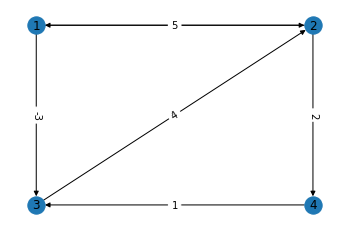

In [2]:
G = nx.DiGraph() # 空の有向グラフ生成

# 重み付きグラフの生成
nodes = [1, 2, 3, 4] # ノード
edges = [(1, 2, 8), (1, 3, -3), (2, 1, 5), (2, 4, 2), (3, 2, 4), (4, 3, 1)]

G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# 各ノードの座標
pos = {1:(0,1), 2:(1,1), 3:(0,0), 4:(1,0)}

# 重み（距離）の表示
#nx.draw_networkx_edge_labels(G, pos)

# 重みのみの表示
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

# 描画
nx.draw(G, pos, with_labels=True)

## 自作のワ―シャルフロイド法

In [3]:
INF = 100000 # 十分大きい値
V = len(nodes) # ノード数

edges_exist = [edge[:2] for edge in edges] # 下の行で初期化する際、辺が存在するか知るために用いる
print('辺が存在するペア：',edges_exist)

G_array = [[edges[edges_exist.index((i+1, j+1))][2] if (i+1, j+1) in edges_exist else INF for j in range(V)] for i in range(V)] # 初期化  ※経路がない＝経路の長さが無限大

# 対角成分を0で上書き
for i in range(V):
    G_array[i][i] = 0
    
print('D0行列：',G_array)

for k in range(V):         # 経由する頂点
    for i in range(V):     # 始点
        for j in range(V): # 終点
            G_array[i][j] = min(G_array[i][j], G_array[i][k] + G_array[k][j])
    print('D',k+1,'行列：',G_array)

print('最終結果：',G_array)

辺が存在するペア： [(1, 2), (1, 3), (2, 1), (2, 4), (3, 2), (4, 3)]
D0行列： [[0, 8, -3, 100000], [5, 0, 100000, 2], [100000, 4, 0, 100000], [100000, 100000, 1, 0]]
D 1 行列： [[0, 8, -3, 100000], [5, 0, 2, 2], [100000, 4, 0, 100000], [100000, 100000, 1, 0]]
D 2 行列： [[0, 8, -3, 10], [5, 0, 2, 2], [9, 4, 0, 6], [100000, 100000, 1, 0]]
D 3 行列： [[0, 1, -3, 3], [5, 0, 2, 2], [9, 4, 0, 6], [10, 5, 1, 0]]
D 4 行列： [[0, 1, -3, 3], [5, 0, 2, 2], [9, 4, 0, 6], [10, 5, 1, 0]]
最終結果： [[0, 1, -3, 3], [5, 0, 2, 2], [9, 4, 0, 6], [10, 5, 1, 0]]


## NetworkXの組み込み関数を使ったワーシャルフロイド法

In [4]:
X = nx.floyd_warshall(G)
Y = {a:dict(b) for a,b in X.items()}
print(Y)

{1: {1: 0, 2: 1, 3: -3, 4: 3}, 2: {2: 0, 1: 5, 4: 2, 3: 2}, 3: {3: 0, 2: 4, 1: 9, 4: 6}, 4: {4: 0, 3: 1, 1: 10, 2: 5}}
